## separate the orange with leaf from given image (multi-color)

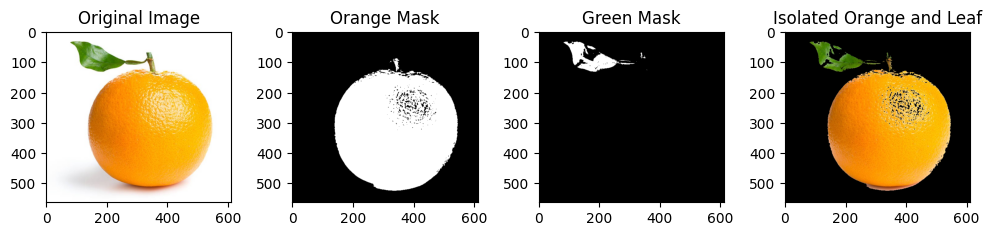

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/thkoczih.png')  # Update with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Define HSV range for the orange color
lower_orange = np.array([5, 100, 100], dtype=np.uint8)
upper_orange = np.array([25, 255, 255], dtype=np.uint8)

# Define HSV range for the green color (leaf)
lower_green = np.array([35, 100, 100], dtype=np.uint8)
upper_green = np.array([85, 255, 255], dtype=np.uint8)

# Create masks for the orange and green parts
orange_mask = cv2.inRange(hsv, lower_orange, upper_orange)
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Combine both masks
combined_mask = cv2.bitwise_or(orange_mask, green_mask)

# Apply the combined mask to the original image
result = cv2.bitwise_and(image, image, mask=combined_mask)

# Display the results
plt.figure(figsize=(10, 7))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(orange_mask, cmap='gray')
plt.title('Orange Mask')

plt.subplot(1, 4, 3)
plt.imshow(green_mask, cmap='gray')
plt.title('Green Mask')

plt.subplot(1, 4, 4)
plt.imshow(result)
plt.title('Isolated Orange and Leaf')

plt.tight_layout()
plt.show()

